In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/assessment/USER_TAKEHOME.csv
/kaggle/input/assessment/TRANSACTION_TAKEHOME.csv
/kaggle/input/assessment/PRODUCTS_TAKEHOME.csv


In [2]:
print(os.getcwd())

/kaggle/working


In [3]:
# Load the data
products = pd.read_csv("/kaggle/input/assessment/PRODUCTS_TAKEHOME.csv")
transactions = pd.read_csv("/kaggle/input/assessment/TRANSACTION_TAKEHOME.csv")
users = pd.read_csv("/kaggle/input/assessment/USER_TAKEHOME.csv")

In [4]:
# Explore the data of users
print(users.head(10))

                         ID               CREATED_DATE  \
0  5ef3b4f17053ab141787697d  2020-06-24 20:17:54.000 Z   
1  5ff220d383fcfc12622b96bc  2021-01-03 19:53:55.000 Z   
2  6477950aa55bb77a0e27ee10  2023-05-31 18:42:18.000 Z   
3  658a306e99b40f103b63ccf8  2023-12-26 01:46:22.000 Z   
4  653cf5d6a225ea102b7ecdc2  2023-10-28 11:51:50.000 Z   
5  5fe2b6f3ad416a1265c4ab68  2020-12-23 03:18:11.000 Z   
6  651210546816bb4d035b1ead  2023-09-25 22:57:24.000 Z   
7  642831ea3d4434e63c1936fd  2023-04-01 13:30:18.000 Z   
8  63a4c9a1b5f32149b9d82f9e  2022-12-22 21:18:25.000 Z   
9  63654b21d02459d8a57a2e2c  2022-11-04 17:25:53.000 Z   

                  BIRTH_DATE STATE LANGUAGE      GENDER  
0  2000-08-11 00:00:00.000 Z    CA   es-419      female  
1  2001-09-24 04:00:00.000 Z    PA       en      female  
2  1994-10-28 00:00:00.000 Z    FL   es-419      female  
3                        NaN    NC       en         NaN  
4  1972-03-19 00:00:00.000 Z    PA       en      female  
5  1999-10-27

In [12]:
print(users.tail())

                             ID               CREATED_DATE  \
99995  61fc06d41febf771966da8fa  2022-02-03 16:46:12.000 Z   
99996  6391e7ef90ad5449ec5f782d  2022-12-08 13:34:39.000 Z   
99997  637d5efdd6f2a49c49934dcb  2022-11-22 23:45:05.000 Z   
99998  5f0de23b05d8a6147dc0cafa  2020-07-14 16:50:04.000 Z   
99999  5e7ab436905e9512ff44abc8  2020-03-25 01:30:30.000 Z   

                      BIRTH_DATE STATE LANGUAGE  GENDER  
99995  1992-03-16 08:00:00.000 Z    CA       en  female  
99996  1993-09-23 05:00:00.000 Z    MO       en  female  
99997  1983-04-19 00:00:00.000 Z    RI       en  female  
99998  1995-06-09 04:00:00.000 Z    DE       en  female  
99999  1995-12-15 05:00:00.000 Z    VA      NaN  female  


In [6]:
print(users.shape) #It will show the number of rows and columns in the data

(100000, 6)


In [7]:
print("All user column's names")
print(users.columns)  # Lists all column names
print(users.info())   # Provides data types and non-null counts

All user column's names
Index(['ID', 'CREATED_DATE', 'BIRTH_DATE', 'STATE', 'LANGUAGE', 'GENDER'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB
None


In [15]:
print("Numericl Data Summery")
print(users.describe())  # Numerical summary
print("Categorical Data Summery")
print(users.describe(include='object'))  # Summary for categorical columns

Numericl Data Summery
                              ID               CREATED_DATE  \
count                     100000                     100000   
unique                    100000                      99942   
top     5ef3b4f17053ab141787697d  2023-01-12 18:30:15.000 Z   
freq                           1                          2   

                       BIRTH_DATE  STATE LANGUAGE  GENDER  
count                       96325  95188    69492   94108  
unique                      54721     52        2      11  
top     1970-01-01 00:00:00.000 Z     TX       en  female  
freq                         1272   9028    63403   64240  
Categorical Data Summery
                              ID               CREATED_DATE  \
count                     100000                     100000   
unique                    100000                      99942   
top     5ef3b4f17053ab141787697d  2023-01-12 18:30:15.000 Z   
freq                           1                          2   

                     

In [16]:
print("\nMissing Values in Users:")
print(users.isnull().sum())


Missing Values in Users:
ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64


In [17]:
# Check for duplicates
print("\nDuplicate Rows in Users:", users.duplicated().sum())


Duplicate Rows in Users: 0


In [18]:
# Sample unique values for understanding
print("\nSample Unique Values in Users:")
for col in users.columns:
    print(f"{col}: {users[col].unique()[:5]}")


Sample Unique Values in Users:
ID: ['5ef3b4f17053ab141787697d' '5ff220d383fcfc12622b96bc'
 '6477950aa55bb77a0e27ee10' '658a306e99b40f103b63ccf8'
 '653cf5d6a225ea102b7ecdc2']
CREATED_DATE: ['2020-06-24 20:17:54.000 Z' '2021-01-03 19:53:55.000 Z'
 '2023-05-31 18:42:18.000 Z' '2023-12-26 01:46:22.000 Z'
 '2023-10-28 11:51:50.000 Z']
BIRTH_DATE: ['2000-08-11 00:00:00.000 Z' '2001-09-24 04:00:00.000 Z'
 '1994-10-28 00:00:00.000 Z' nan '1972-03-19 00:00:00.000 Z']
STATE: ['CA' 'PA' 'FL' 'NC' 'NY']
LANGUAGE: ['es-419' 'en' nan]
GENDER: ['female' nan 'male' 'non_binary' 'transgender']


In [19]:
print((users == float('inf')).sum())
print((users == float('-inf')).sum())

ID              0
CREATED_DATE    0
BIRTH_DATE      0
STATE           0
LANGUAGE        0
GENDER          0
dtype: int64
ID              0
CREATED_DATE    0
BIRTH_DATE      0
STATE           0
LANGUAGE        0
GENDER          0
dtype: int64


In [20]:
for col in users.select_dtypes(include='object').columns:
    print(users[col].value_counts())

ID
5ef3b4f17053ab141787697d    1
5f889d85746cfc1620c10130    1
5dc6eb9192ad0e12e283bcb2    1
5f1de98e57441c14b826b270    1
5efe2d8d6e0151146c9a31bc    1
                           ..
66caa561ceb005043d74acf3    1
604b67b40134cc12de1361fb    1
66a156f8465f309038b30946    1
5fc5d3b4a071f3282e52f0c6    1
5e7ab436905e9512ff44abc8    1
Name: count, Length: 100000, dtype: int64
CREATED_DATE
2023-01-12 18:30:15.000 Z    2
2019-08-28 02:21:44.000 Z    2
2024-04-11 02:56:41.000 Z    2
2024-03-11 17:03:02.000 Z    2
2024-02-25 20:43:59.000 Z    2
                            ..
2024-08-25 03:30:41.000 Z    1
2021-03-12 13:08:04.000 Z    1
2024-07-24 19:33:12.000 Z    1
2020-12-01 05:25:08.000 Z    1
2020-03-25 01:30:30.000 Z    1
Name: count, Length: 99942, dtype: int64
BIRTH_DATE
1970-01-01 00:00:00.000 Z    1272
1979-12-11 08:00:00.000 Z      63
2000-12-12 00:00:00.000 Z      28
2000-12-31 00:00:00.000 Z      23
2001-01-01 00:00:00.000 Z      16
                             ... 
2004-02-21 08:0

In [44]:
# Check missing data percentages
# Calculate the percentage of missing data for each column.
missing_data = users.isnull().mean() * 100
print("Missing Data Percentages:")
print(missing_data)

# Explore unique values in the GENDER column
print("\nUnique GENDER Values:")
print(users['GENDER'].unique())

# Normalize GENDER values for better understanding
normalized_gender = users['GENDER'].str.lower().str.strip().unique()
print("\nNormalized Unique GENDER Values:")
print(normalized_gender)

# Explore unique LANGUAGE values
print("\nUnique LANGUAGE Values:")
print(users['LANGUAGE'].unique())


Missing Data Percentages:
ID               0.000
CREATED_DATE     0.000
BIRTH_DATE       3.675
STATE            4.812
LANGUAGE        30.508
GENDER           5.892
dtype: float64

Unique GENDER Values:
['female' nan 'male' 'non_binary' 'transgender' 'prefer_not_to_say'
 'not_listed' 'Non-Binary' 'unknown' 'not_specified'
 "My gender isn't listed" 'Prefer not to say']

Normalized Unique GENDER Values:
['female' nan 'male' 'non_binary' 'transgender' 'prefer_not_to_say'
 'not_listed' 'non-binary' 'unknown' 'not_specified'
 "my gender isn't listed" 'prefer not to say']

Unique LANGUAGE Values:
['es-419' 'en' nan]


In [31]:
print(users.duplicated().sum())  # Count duplicate rows

0


In [43]:
for col in users.select_dtypes(include='number').columns:
    print(f"{col}:")
    print(users[col].quantile([0.01, 0.99]))  # 1st and 99th percentiles

In [49]:
# Explore unique values in LANGUAGE
print("Unique LANGUAGE values:")
print(users['LANGUAGE'].unique())

# Count occurrences of each LANGUAGE
language_counts = users['LANGUAGE'].value_counts(dropna=False)
print("\nLANGUAGE distribution:")
print(language_counts)


Unique LANGUAGE values:
['es-419' 'en' nan]

LANGUAGE distribution:
LANGUAGE
en        63403
NaN       30508
es-419     6089
Name: count, dtype: int64


In [ ]:
# Are there any data quality issues present?
# Missing Data:

# BIRTH_DATE: 3.7% missing.
# STATE: 4.8% missing.
# LANGUAGE: 30.5% missing.
# GENDER: 5.9% missing.

# Inconsistent or Invalid Values:
# GENDER includes inconsistent entries(e.g., "non_binary" vs. "Non-Binary") and unclear values (e.g., "unknown," "prefer_not_to_say").
# Some BIRTH_DATE values may be invalid (e.g., unrealistic birth years).

# LANGUAGE: The column utilizes language codes (e.g., "es-419") that are not inherently descriptive. Mapping these codes to corresponding full language names (e.g., "Spanish - Latin America") would improve interpretability for analysis.

# GENDER: The column contains inconsistent and ambiguous entries, such as variations in capitalization ("non_binary" vs. "Non-Binary") and vague responses ("unknown," "prefer_not_to_say"). Standardizing these values into a consistent taxonomy is recommended for meaningful analysis.

# STATE: The column has missing data, which could impact downstream analyses involving geographic segmentation. Further investigation into the missing entries and potential imputation strategies might be required to address this issue effectively.



In [18]:
# Explore the data of transactions
print(transactions.head(10))

                             RECEIPT_ID PURCHASE_DATE  \
0  0000d256-4041-4a3e-adc4-5623fb6e0c99    2024-08-21   
1  0001455d-7a92-4a7b-a1d2-c747af1c8fd3    2024-07-20   
2  00017e0a-7851-42fb-bfab-0baa96e23586    2024-08-18   
3  000239aa-3478-453d-801e-66a82e39c8af    2024-06-18   
4  00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1    2024-07-04   
5  0002d8cd-1701-4cdd-a524-b70402e2dbc0    2024-06-24   
6  000550b2-1480-4c07-950f-ff601f242152    2024-07-06   
7  00096c49-8b04-42f9-88ce-941c5e06c4a7    2024-08-19   
8  000e1d35-15e5-46c6-b6b3-33653ed3d27e    2024-08-13   
9  0010d87d-1ad2-4e5e-9a25-cec736919d15    2024-08-04   

                   SCAN_DATE STORE_NAME                   USER_ID  \
0  2024-08-21 14:19:06.539 Z    WALMART  63b73a7f3d310dceeabd4758   
1  2024-07-20 09:50:24.206 Z       ALDI  62c08877baa38d1a1f6c211a   
2  2024-08-19 15:38:56.813 Z    WALMART  60842f207ac8b7729e472020   
3  2024-06-19 11:03:37.468 Z  FOOD LION  63fcd7cea4f8442c3386b589   
4  2024-07-05 15:56:43.549 

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [51]:
# Explore the data of transactions
print(transactions.tail())

                                 RECEIPT_ID PURCHASE_DATE  \
49995  b5cd61a9-8033-4913-a5c4-fb3f65e3a321    2024-08-21   
49996  e1b2f634-c9ad-4152-b662-4b22efc25862    2024-08-11   
49997  b07ef8dd-e444-40a2-819b-f74a3e5f1ae7    2024-07-11   
49998  42475141-bef4-4df2-aa37-72577e2512bb    2024-06-18   
49999  3a179c4e-46f2-4126-b3d2-3514afc23a3e    2024-08-07   

                       SCAN_DATE     STORE_NAME                   USER_ID  \
49995  2024-08-31 14:13:08.634 Z         TARGET  6154bcf098f885648de2f299   
49996  2024-08-11 18:15:56.736 Z    STOP & SHOP  60aa809f188b926b2244c974   
49997  2024-07-11 08:03:25.816 Z        WALMART  60bd26e83dc3b13a15c5f4e7   
49998  2024-06-18 19:57:32.211 Z  MARKET BASKET  6169912fac47744405af62b7   
49999  2024-08-07 15:30:07.911 Z        WALMART  64e94d64ca929250373ef6e1   

            BARCODE FINAL_QUANTITY FINAL_SALE  
49995  8.523911e+10           2.00       1.18  
49996  4.610040e+10           1.00       2.00  
49997  6.466300e+11       

In [39]:
print(transactions.shape) #It will show the number of rows and columns in the data

(50000, 8)


In [17]:
print("All transactions column's names")
print(transactions.columns)  # Lists all column names
print(transactions.info())   # Provides data types and non-null counts

All transactions column's names
Index(['RECEIPT_ID', 'PURCHASE_DATE', 'SCAN_DATE', 'STORE_NAME', 'USER_ID',
       'BARCODE', 'FINAL_QUANTITY', 'FINAL_SALE'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB
None


In [41]:
print("Numericl Data Summery")
print(transactions.describe())  # Numerical summary
print("Categorical Data Summery")
print(transactions.describe(include='object'))  # Summary for categorical columns

Numericl Data Summery
            BARCODE
count  4.423800e+04
mean   1.715863e+11
std    3.269219e+11
min   -1.000000e+00
25%    3.077212e+10
50%    5.210004e+10
75%    8.536765e+10
max    9.347108e+12
Categorical Data Summery
                                  RECEIPT_ID PURCHASE_DATE  \
count                                  50000         50000   
unique                                 24440            89   
top     bedac253-2256-461b-96af-267748e6cecf    2024-06-15   
freq                                      12           774   

                        SCAN_DATE STORE_NAME                   USER_ID  \
count                       50000      50000                     50000   
unique                      24440        954                     17694   
top     2024-09-08 20:00:42.348 Z    WALMART  64e62de5ca929250373e6cf5   
freq                           12      21326                        22   

       FINAL_QUANTITY FINAL_SALE  
count           50000      50000  
unique             87

In [42]:
print("\nMissing Values in Users:")
print(transactions.isnull().sum())


Missing Values in Users:
RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64


In [60]:
# Check for duplicates
print("\nDuplicate Rows in transactions:", transactions.duplicated().sum())


Duplicate Rows in transactions: 171


In [45]:
# Sample unique values for understanding
print("\nSample Unique Values in transactions:")
for col in transactions.columns:
    print(f"{col}: {transactions[col].unique()[:5]}")


Sample Unique Values in transactions:
RECEIPT_ID: ['0000d256-4041-4a3e-adc4-5623fb6e0c99'
 '0001455d-7a92-4a7b-a1d2-c747af1c8fd3'
 '00017e0a-7851-42fb-bfab-0baa96e23586'
 '000239aa-3478-453d-801e-66a82e39c8af'
 '00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1']
PURCHASE_DATE: ['2024-08-21' '2024-07-20' '2024-08-18' '2024-06-18' '2024-07-04']
SCAN_DATE: ['2024-08-21 14:19:06.539 Z' '2024-07-20 09:50:24.206 Z'
 '2024-08-19 15:38:56.813 Z' '2024-06-19 11:03:37.468 Z'
 '2024-07-05 15:56:43.549 Z']
STORE_NAME: ['WALMART' 'ALDI' 'FOOD LION' 'RANDALLS' 'TARGET']
USER_ID: ['63b73a7f3d310dceeabd4758' '62c08877baa38d1a1f6c211a'
 '60842f207ac8b7729e472020' '63fcd7cea4f8442c3386b589'
 '6193231ae9b3d75037b0f928']
BARCODE: [1.53000150e+10            nan 7.87422298e+10 7.83399747e+11
 4.79005012e+10]
FINAL_QUANTITY: ['1.00' 'zero' '2.00' '3.00' '4.00']
FINAL_SALE: [' ' '1.49' '3.49' '1.46' '3.59']


In [46]:
print((transactions == float('inf')).sum())
print((transactions == float('-inf')).sum())

RECEIPT_ID        0
PURCHASE_DATE     0
SCAN_DATE         0
STORE_NAME        0
USER_ID           0
BARCODE           0
FINAL_QUANTITY    0
FINAL_SALE        0
dtype: int64
RECEIPT_ID        0
PURCHASE_DATE     0
SCAN_DATE         0
STORE_NAME        0
USER_ID           0
BARCODE           0
FINAL_QUANTITY    0
FINAL_SALE        0
dtype: int64


In [47]:
for col in transactions.select_dtypes(include='object').columns:
    print(transactions[col].value_counts())

RECEIPT_ID
bedac253-2256-461b-96af-267748e6cecf    12
bc304cd7-8353-4142-ac7f-f3ccec720cb3     8
4ec870d2-c39f-4a40-bf8a-26a079409b20     8
2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711     8
760c98da-5174-401f-a203-b839c4d406be     8
                                        ..
56a368e6-d677-459d-ba05-70a886c3126b     2
56a0e14c-187c-43ec-96ab-b67ac5c197f1     2
569f4be9-63d1-4afd-8ed5-d520ce85b878     2
56946262-15b1-41fd-8814-fc544d35fc6c     2
fffe8012-7dcf-4d84-b6c6-feaacab5074a     2
Name: count, Length: 24440, dtype: int64
PURCHASE_DATE
2024-06-15    774
2024-07-03    772
2024-07-01    752
2024-08-03    720
2024-07-13    712
             ... 
2024-09-07    428
2024-08-21    422
2024-09-06    394
2024-09-04    390
2024-09-08    282
Name: count, Length: 89, dtype: int64
SCAN_DATE
2024-09-08 20:00:42.348 Z    12
2024-09-07 17:30:53.326 Z     8
2024-09-08 19:39:01.589 Z     8
2024-09-08 11:13:01.935 Z     8
2024-09-07 14:52:46.822 Z     8
                             ..
2024-07-24 17:43:01.957

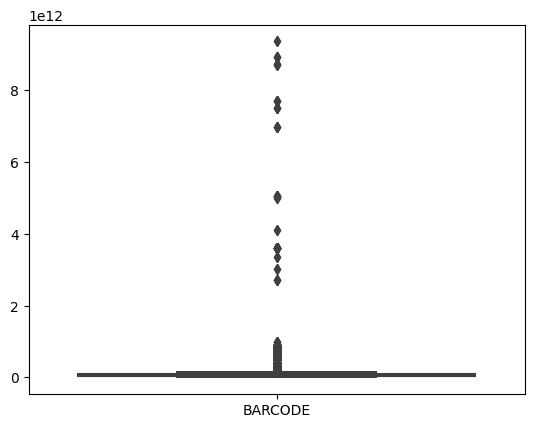

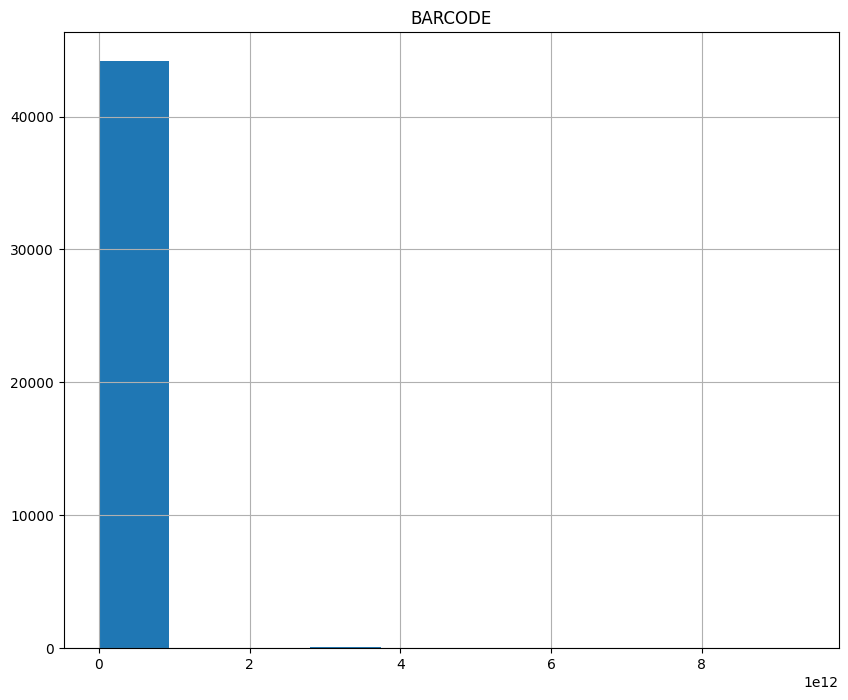

In [48]:
sns.boxplot(data=transactions.select_dtypes(include='number'))
plt.show()
transactions.hist(figsize=(10, 8))
plt.show()

In [65]:
for col in transactions.select_dtypes(include='number').columns:
    print(f"{col}:")
    print(transactions[col].quantile([0.01, 0.99]))  # 1st and 99th percentiles
print(transactions.duplicated().sum())  # Count duplicate rows

BARCODE:
0.01    9.697867e+06
0.99    8.881090e+11
Name: BARCODE, dtype: float64
171


In [65]:
# Calculate missing percentage for BARCODE
barcode_missing_percentage = transactions['BARCODE'].isnull().mean() * 100
print(f"Percentage of missing BARCODE values: {barcode_missing_percentage:.2f}%")

# Count rows with empty or space values in FINAL_SALE
final_sale_empty_count = (transactions['FINAL_SALE'] == " ").sum()
print(f"Number of empty or space values in FINAL_SALE: {final_sale_empty_count}")

# Check for non-numeric values in FINAL_QUANTITY
non_numeric_quantity = transactions[~transactions['FINAL_QUANTITY'].str.replace('.', '', 1).str.isdigit()]
print(f"Number of non-numeric values in FINAL_QUANTITY: {len(non_numeric_quantity)}")
print(non_numeric_quantity[['FINAL_QUANTITY']].head())

# Check for non-numeric values in FINAL_SALE
non_numeric_sales = transactions[~transactions['FINAL_SALE'].str.replace('.', '', 1).str.isdigit()]
print(f"Number of non-numeric values in FINAL_SALE: {len(non_numeric_sales)}")
print(non_numeric_sales[['FINAL_SALE']].head())

# Convert dates to datetime objects
transactions['PURCHASE_DATE'] = pd.to_datetime(transactions['PURCHASE_DATE'])
transactions['SCAN_DATE'] = pd.to_datetime(transactions['SCAN_DATE'], errors='coerce')

# Analyze BARCODE missing values
barcode_missing = transactions['BARCODE'].isnull().sum()
print(f"Total missing BARCODE values: {barcode_missing}")

# Check for entries like "zero" in FINAL_QUANTITY
quantity_zero_entries = transactions[transactions['FINAL_QUANTITY'].str.lower() == "zero"]
print(f"Rows with 'zero' in FINAL_QUANTITY: {len(quantity_zero_entries)}")
print(quantity_zero_entries[['FINAL_QUANTITY']].head())


Percentage of missing BARCODE values: 11.52%
Number of empty or space values in FINAL_SALE: 12500
Number of non-numeric values in FINAL_QUANTITY: 12500
  FINAL_QUANTITY
1           zero
3           zero
5           zero
7           zero
9           zero
Number of non-numeric values in FINAL_SALE: 12500
  FINAL_SALE
0           
2           
4           
6           
8           
Total missing BARCODE values: 5762
Rows with 'zero' in FINAL_QUANTITY: 12500
  FINAL_QUANTITY
1           zero
3           zero
5           zero
7           zero
9           zero


In [ ]:
# Are there any data quality issues present?
# Missing Data:

# The BARCODE column has 11.5% missing values.
# The FINAL_SALE column contains empty strings or spaces that should be treated as missing values.
# Inconsistent or Invalid Values:

# FINAL_QUANTITY includes non-numeric entries like "zero," which should be standardized for numerical analysis.
# FINAL_SALE has non-numeric or invalid entries, which could cause errors during calculations.
# Date Inconsistencies:
# Potential misalignment between PURCHASE_DATE and SCAN_DATE (e.g., instances where SCAN_DATE is earlier than PURCHASE_DATE).

#                                                                                      Are there any fields that are challenging to understand?
# BARCODE: The meaning of missing values or how these should be handled is unclear.
# STORE_NAME: If there are multiple formats or abbreviations for store names, it may require standardization.
# FINAL_QUANTITY: The inclusion of terms like "zero" instead of numeric 0 is inconsistent.


In [13]:
# Explore the data of products
print(products.head())

          CATEGORY_1              CATEGORY_2                   CATEGORY_3  \
0  Health & Wellness           Sexual Health  Conductivity Gels & Lotions   
1             Snacks           Puffed Snacks         Cheese Curls & Puffs   
2  Health & Wellness               Hair Care        Hair Care Accessories   
3  Health & Wellness               Oral Care                   Toothpaste   
4  Health & Wellness  Medicines & Treatments               Essential Oils   

  CATEGORY_4                                       MANUFACTURER  \
0        NaN                                                NaN   
1        NaN                                                NaN   
2        NaN                           PLACEHOLDER MANUFACTURER   
3        NaN                                  COLGATE-PALMOLIVE   
4        NaN  MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...   

             BRAND       BARCODE  
0              NaN  7.964944e+11  
1              NaN  2.327801e+10  
2          ELECSOP  4.618178e

In [14]:
print(products.tail())

               CATEGORY_1                                CATEGORY_2  \
845547  Health & Wellness  Topical Muscle & Joint Relief Treatments   
845548             Snacks                                   Cookies   
845549             Snacks                                     Candy   
845550             Snacks                              Nuts & Seeds   
845551  Health & Wellness                                 First Aid   

              CATEGORY_3 CATEGORY_4           MANUFACTURER      BRAND  \
845547    Braces & Wraps        NaN                    NaN        NaN   
845548               NaN        NaN  TREEHOUSE FOODS, INC.  LOFTHOUSE   
845549  Confection Candy        NaN    HARIBO GMBH & CO KG     HARIBO   
845550         Hazelnuts        NaN         DOUBLE-COLA CO      JUMBO   
845551    First Aid Kits        NaN                     3M    NEXCARE   

             BARCODE  
845547  7.223016e+11  
845548  4.182082e+10  
845549  1.001672e+11  
845550  7.539076e+10  
845551  7.967933e+1

In [15]:
print(products.shape)

(845552, 7)


In [16]:
print("All user column's names")
print(products.columns)  # Lists all column names
print(products.info())   # Provides data types and non-null counts

All user column's names
Index(['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4', 'MANUFACTURER',
       'BRAND', 'BARCODE'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB
None


In [17]:
print("Numericl Data Summery")
print(products.describe())  # Numerical summary
print("Categorical Data Summery")
print(products.describe(include='object'))  # Summary for categorical columns

Numericl Data Summery
            BARCODE
count  8.415270e+05
mean   6.016109e+11
std    1.022530e+12
min    1.850000e+02
25%    7.124923e+10
50%    6.344185e+11
75%    7.683955e+11
max    6.291108e+13
Categorical Data Summery
               CATEGORY_1 CATEGORY_2        CATEGORY_3 CATEGORY_4  \
count              845441     844128            784986      67459   
unique                 27        121               344        127   
top     Health & Wellness      Candy  Confection Candy  Lip Balms   
freq               512695     121036             56965       9737   

                    MANUFACTURER      BRAND  
count                     619078     619080  
unique                      4354       8122  
top     PLACEHOLDER MANUFACTURER  REM BRAND  
freq                       86902      20813  


In [18]:
print("\nMissing Values in Users:")
print(products.isnull().sum())


Missing Values in Users:
CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64


In [19]:
# Check for duplicates
print("\nDuplicate Rows in products:", products.duplicated().sum())


Duplicate Rows in products: 215


In [20]:
# Sample unique values for understanding
print("\nSample Unique Values in products:")
for col in products.columns:
    print(f"{col}: {products[col].unique()[:5]}")


Sample Unique Values in products:
CATEGORY_1: ['Health & Wellness' 'Snacks' 'Beverages' 'Pantry' 'Alcohol']
CATEGORY_2: ['Sexual Health' 'Puffed Snacks' 'Hair Care' 'Oral Care'
 'Medicines & Treatments']
CATEGORY_3: ['Conductivity Gels & Lotions' 'Cheese Curls & Puffs'
 'Hair Care Accessories' 'Toothpaste' 'Essential Oils']
CATEGORY_4: [nan 'Hair Brushes & Combs' "Women's Shaving Gel & Cream" 'Lip Balms'
 'Already Popped Popcorn']
MANUFACTURER: [nan 'PLACEHOLDER MANUFACTURER' 'COLGATE-PALMOLIVE'
 'MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHANGEABLY.' 'HALEON']
BRAND: [nan 'ELECSOP' 'COLGATE' 'MAPLE HOLISTICS' 'BEAUHAIR']
BARCODE: [7.96494408e+11 2.32780110e+10 4.61817824e+11 3.50004668e+10
 8.06810850e+11]


In [21]:
print((products == float('inf')).sum())
print((products == float('-inf')).sum())


CATEGORY_1      0
CATEGORY_2      0
CATEGORY_3      0
CATEGORY_4      0
MANUFACTURER    0
BRAND           0
BARCODE         0
dtype: int64
CATEGORY_1      0
CATEGORY_2      0
CATEGORY_3      0
CATEGORY_4      0
MANUFACTURER    0
BRAND           0
BARCODE         0
dtype: int64


In [22]:
for col in products.select_dtypes(include='object').columns:
    print(products[col].value_counts())

CATEGORY_1
Health & Wellness         512695
Snacks                    324817
Beverages                   3990
Pantry                       871
Apparel & Accessories        846
Dairy                        602
Needs Review                 547
Alcohol                      503
Home & Garden                115
Restaurant                    69
Deli & Bakery                 69
Frozen                        62
Meat & Seafood                49
Sporting Goods                47
Office & School               45
Toys & Games                  28
Household Supplies            24
Produce                       20
Animals & Pet Supplies        16
Arts & Entertainment           7
Electronics                    5
Mature                         3
Vehicles & Parts               3
Baby & Toddler                 3
Beauty                         2
Media                          2
Luggage & Bags                 1
Name: count, dtype: int64
CATEGORY_2
Candy                      121036
Hair Care                  

In [23]:
print(products.info())  # This will show column names and types

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11
...,...,...,...,...,...,...,...
845547,Health & Wellness,Topical Muscle & Joint Relief Treatments,Braces & Wraps,NaN,NaN,NaN,7.223016e+11
845548,Snacks,Cookies,NaN,NaN,"TREEHOUSE FOODS, INC.",LOFTHOUSE,4.182082e+10
845549,Snacks,Candy,Confection Candy,NaN,HARIBO GMBH & CO KG,HARIBO,1.001672e+11
845550,Snacks,Nuts & Seeds,Hazelnuts,NaN,DOUBLE-COLA CO,JUMBO,7.539076e+10


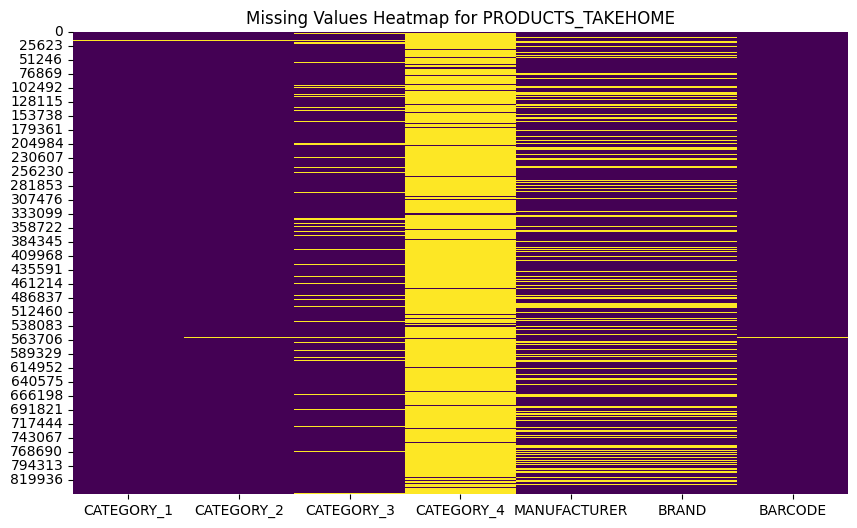

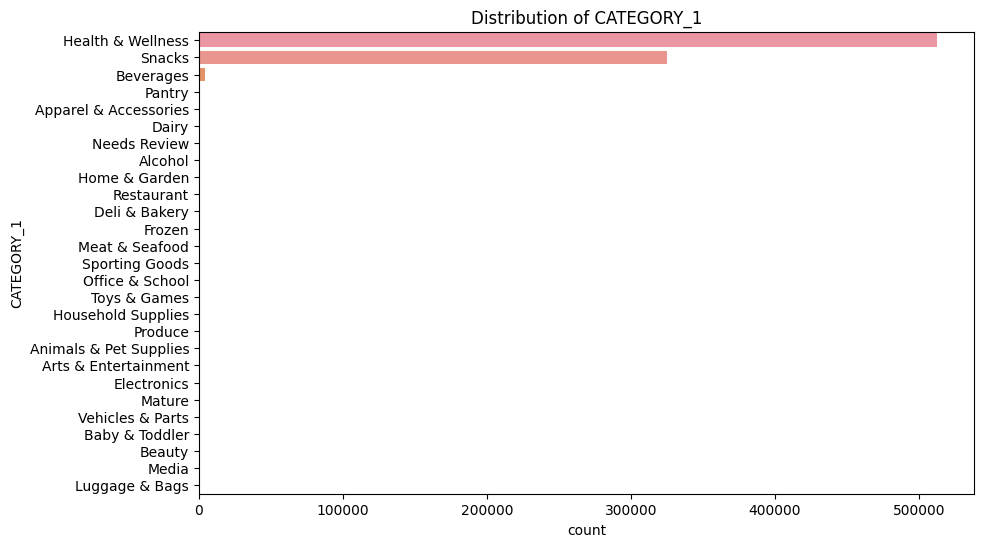

{'info':                CATEGORY_1                                CATEGORY_2  \
 0       Health & Wellness                             Sexual Health   
 1                  Snacks                             Puffed Snacks   
 2       Health & Wellness                                 Hair Care   
 3       Health & Wellness                                 Oral Care   
 4       Health & Wellness                    Medicines & Treatments   
 ...                   ...                                       ...   
 845547  Health & Wellness  Topical Muscle & Joint Relief Treatments   
 845548             Snacks                                   Cookies   
 845549             Snacks                                     Candy   
 845550             Snacks                              Nuts & Seeds   
 845551  Health & Wellness                                 First Aid   
 
                          CATEGORY_3 CATEGORY_4  \
 0       Conductivity Gels & Lotions        NaN   
 1              Cheese C

In [24]:
# Check for missing values
missing_values = products.isnull().sum()

# # Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(products.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap for PRODUCTS_TAKEHOME")
plt.show()

# # Check for duplicate rows
duplicate_rows = products.duplicated().sum()

# # Preview unique values in key fields
unique_categories = {
    "CATEGORY_1": products["CATEGORY_1"].nunique(),
    "CATEGORY_2": products["CATEGORY_2"].nunique(),
    "CATEGORY_3": products["CATEGORY_3"].nunique(),
    "CATEGORY_4": products["CATEGORY_4"].nunique(),
    "MANUFACTURER": products["MANUFACTURER"].nunique(),
    "BRAND": products["BRAND"].nunique(),
}

# # Display distribution of values in 'CATEGORY_1'
plt.figure(figsize=(10, 6))
sns.countplot(y="CATEGORY_1", data=products, order=products["CATEGORY_1"].value_counts().index)
plt.title("Distribution of CATEGORY_1")
plt.show()

{
    "info": products,
    "missing_values": missing_values,
    "duplicate_rows": duplicate_rows,
    "unique_categories": unique_categories,
}

In [ ]:
# CATEGORY_1, CATEGORY_2, CATEGORY_3, CATEGORY_4, MANUFACTURER, and BRAND have varying levels of missing data.
# The BARCODE field is missing for a small percentage of rows.
# It’s unclear if all rows represent unique products, as the same BARCODE may appear multiple times in both datasets.
# CATEGORY_4 is sparsely populated, making it less reliable for analysis.
# There might be duplicate records in BARCODE, MANUFACTURER, and BRAND that require deduplication for clean analysis.


In [4]:
# Create SQLite database
conn = sqlite3.connect("fetch.db")

# Load data into SQLite database
users.to_sql("Users", conn, if_exists="replace", index=False)
transactions.to_sql("Transactions", conn, if_exists="replace", index=False)
products.to_sql("Products", conn, if_exists="replace", index=False)

845552

In [12]:
query = """
SELECT 
    p.brand, 
    COUNT(t.receipt_id) AS receipt_count
FROM Transactions t
JOIN Users u ON t.USER_ID = u.ID
JOIN Products p ON t.BARCODE = p.BARCODE
WHERE (julianday('now') - julianday(u.BIRTH_DATE )) / 365 >= 21
GROUP BY p.brand
ORDER BY receipt_count DESC
LIMIT 5;
"""
result = pd.read_sql_query(query, conn)
print(result)


             BRAND  receipt_count
0      NERDS CANDY              6
1             DOVE              6
2             None              6
3          TRIDENT              4
4  SOUR PATCH KIDS              4


In [16]:
query = """
SELECT 
    p.brand, 
    SUM(t.FINAL_SALE) AS total_sales
FROM Transactions t
JOIN Users u ON t.USER_ID = u.ID
JOIN Products p ON t.BARCODE = p.BARCODE
WHERE julianday('now') - julianday(u.CREATED_DATE) > 180
GROUP BY p.brand
ORDER BY total_sales DESC
LIMIT 5;
"""
result = pd.read_sql_query(query, conn)
print(result)


         BRAND  total_sales
0          CVS        72.00
1      TRIDENT        46.72
2         DOVE        42.88
3  COORS LIGHT        34.96
4         None        16.65


In [56]:
query = """
SELECT 
    CASE 
        WHEN strftime('%Y', u.BIRTH_DATE) IS NULL THEN 'Unknown'
        WHEN CAST(strftime('%Y', u.BIRTH_DATE) AS INT) < 1946 THEN 'Silent'
        WHEN CAST(strftime('%Y', u.BIRTH_DATE) AS INT) BETWEEN 1946 AND 1964 THEN 'Baby Boomers'
        WHEN CAST(strftime('%Y', u.BIRTH_DATE) AS INT) BETWEEN 1965 AND 1980 THEN 'Generation X'
        WHEN CAST(strftime('%Y', u.BIRTH_DATE) AS INT) BETWEEN 1981 AND 1996 THEN 'Millennials'
        WHEN CAST(strftime('%Y', u.BIRTH_DATE) AS INT) BETWEEN 1997 AND 2012 THEN 'Generation Z'
        ELSE 'Generation Alpha'
    END AS generation,
    SUM(CASE WHEN p.category_1 = 'Health & Wellness' THEN t.FINAL_SALE ELSE 0 END) AS health_sales,
    SUM(t.FINAL_SALE) AS total_sales,
    (SUM(CASE WHEN p.category_1 = 'Health & Wellness' THEN t.FINAL_SALE ELSE 0 END) * 100.0) / SUM(t.FINAL_SALE) AS health_sales_percentage
FROM Transactions t
JOIN Users u ON t.USER_ID = u.ID
JOIN Products p ON t.BARCODE = p.BARCODE
GROUP BY generation;
"""

result = pd.read_sql_query(query, conn)
print(result)


     generation  health_sales  total_sales  health_sales_percentage
0  Baby Boomers         89.03       225.57                39.468901
1  Generation X         41.50       138.95                29.866859
2  Generation Z          0.00         1.97                 0.000000
3   Millennials         59.13       147.97                39.960803
4        Silent          0.00        13.42                 0.000000


In [16]:
#Power users are those with over 2 quantity\and total spending of more than 80.

query = """
SELECT 
    u.ID, 
    COUNT(t.RECEIPT_ID) AS transaction_count, 
    SUM(t.FINAL_SALE) AS total_spent
FROM Transactions t
JOIN Users u ON t.USER_ID = u.ID
GROUP BY u.ID
HAVING COUNT(t.FINAL_QUANTITY) > 2 AND SUM(t.FINAL_SALE) > 20
ORDER BY total_spent DESC;
"""
result = pd.read_sql_query(query, conn)
print(result)


                         ID  transaction_count  total_spent
0  643059f0838dd2651fb27f50                  4        75.99
1  62ffec490d9dbaff18c0a999                  6        52.28
2  6351760a3a4a3534d9393ecd                  4        27.74
3  64dd9170516348066e7c4006                  4        26.52
4  62c09104baa38d1a1f6c260e                  6        20.28


In [8]:
query = """
SELECT 
    p.brand, 
    SUM(t.FINAL_SALE) AS Final_sales
FROM Transactions t
JOIN Products p ON t.BARCODE = p.BARCODE
WHERE p.CATEGORY_1 = 'Dips & Salsa'
GROUP BY p.brand
ORDER BY Final_sales DESC
LIMIT 1;
"""
result = pd.read_sql_query(query, conn)
print(result)


Empty DataFrame
Columns: [BRAND, Final_sales]
Index: []


In [9]:
#Growth is calculated based on total sales by year.

query = """
SELECT 
    strftime('%Y', t.PURCHASE_DATE) AS year,
    SUM(t.FINAL_SALE) AS total_sales,
    (SUM(t.FINAL_SALE) - LAG(SUM(t.FINAL_SALE), 1) OVER (ORDER BY strftime('%Y', t.PURCHASE_DATE))) * 100.0 / LAG(SUM(t.FINAL_SALE), 1) OVER (ORDER BY strftime('%Y', t.PURCHASE_DATE)) AS growth_percentage
FROM Transactions t
GROUP BY year
ORDER BY year;
"""
result = pd.read_sql_query(query, conn)
print(result)


   year  total_sales growth_percentage
0  2024     171614.4              None
